## The aim is to develop a model  that can predict  the likelyhood of a client canceling  their reservation by investigating the various traits, features and specifications of the customer. 

The dataset contains information of both Resort hotels and City hotels. The strategy used is to divide the data based on  the  types of  hotel and find the  likelyhood of the reservation being canceled or not. Furhermore, the result could be improved by conducting  a thorough EDA (Exploratory data analysis) to remove data that is not helpful in  informing the customer choice whether they will cancel or not.

In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mano
import warnings

warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/Users/tayyeb/Documents/IBA/Machine Learning/hotel_bookings.csv')     # importing the dataset

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.shape     

(119390, 32)

<AxesSubplot:>

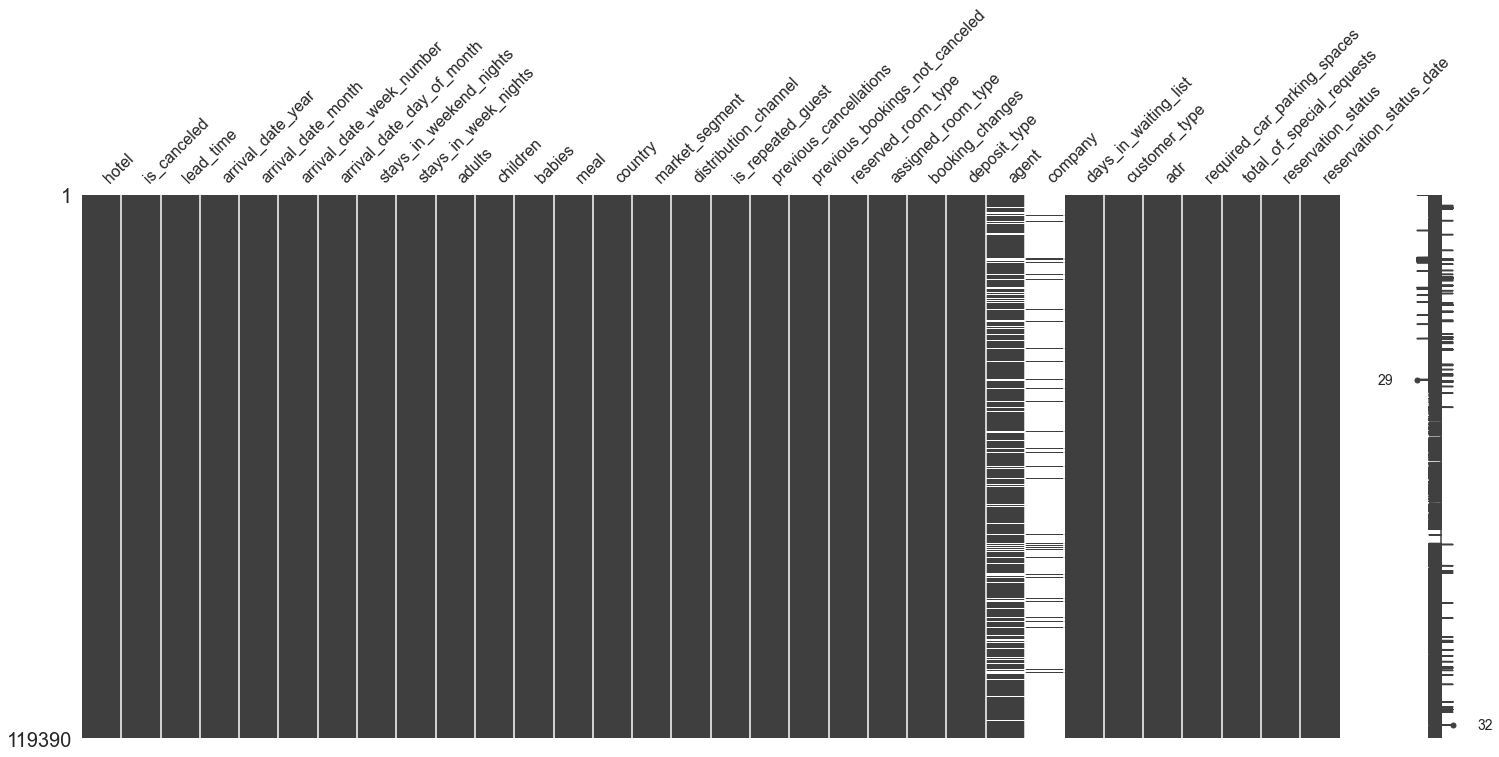

In [6]:
mano.matrix(df)

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

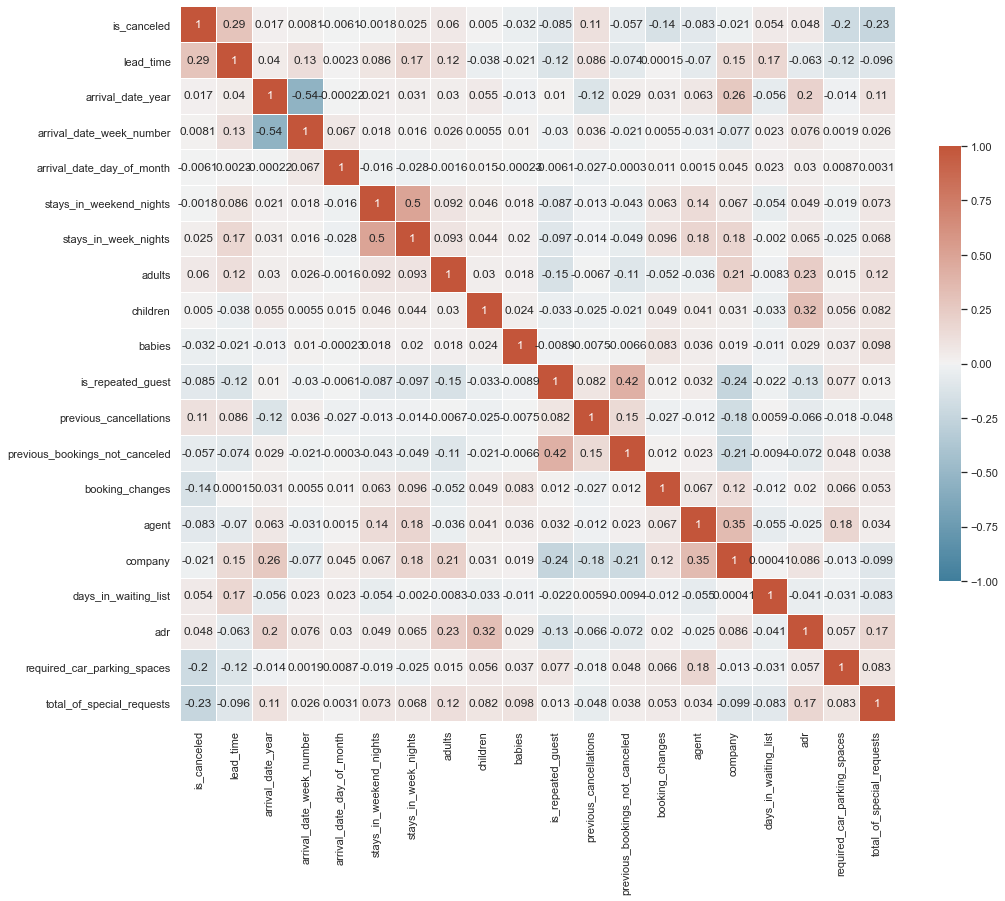

In [8]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [9]:
a=df.corr()["is_canceled"]
a.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [10]:
df.isnull().sum()   


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df1=df.copy()

In [12]:
df1["company"].fillna(0,inplace=True)
df1["agent"].fillna(0,inplace=True)   

In [13]:
 pd.unique(df1["meal"]) 

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
df1["meal"].replace("Undefined","SC",inplace=True)   

In [15]:
 pd.unique(df1["meal"]) 

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [16]:
 pd.unique(df1["children"]) 

array([ 0.,  1.,  2., 10.,  3., nan])

In [17]:
df1["children"].fillna(0,inplace=True)

In [18]:
 pd.unique(df1["children"]) 

array([ 0.,  1.,  2., 10.,  3.])

In [19]:
df1["children"]=df1["children"].astype(int)

In [20]:
 pd.unique(df1["children"]) 

array([ 0,  1,  2, 10,  3])

In [21]:
 pd.unique(df1["meal"]) 

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [22]:
df1["country"].value_counts( dropna=False,ascending=True).tail()

DEU     7287
ESP     8568
FRA    10415
GBR    12129
PRT    48590
Name: country, dtype: int64

In [23]:
df1["country"].fillna("UNK",inplace=True)  # not known location is abbrivated to UNK as per the knwon standard for unknown 

In [24]:
## reservation_status_date  can be dropped 
## deposit_type can be dropped as its the same string value 
df1.drop( ["reservation_status_date"] ,inplace=True, axis=1)

In [25]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [26]:
df1.shape

(119390, 31)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [28]:
 pd.unique(df1["arrival_date_month"]) 

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

## Re-maping the strings to discrete numbers

In [29]:
df1['arrival_date_month'] = df1['arrival_date_month'].astype('category')
df1['arrival_date_month'] = df1['arrival_date_month'].cat.reorder_categories(['January', 'February','March','April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df1['arrival_date_month'] = df1['arrival_date_month'].cat.codes

In [30]:
df1['hotel'] = df1['hotel'].astype('category')
df1['hotel'] = df1['hotel'].cat.reorder_categories(['City Hotel', 'Resort Hotel'], ordered=True)
df1['hotel'] = df1['hotel'].cat.codes

In [31]:
df1['meal'] = df1['meal'].astype('category')
df1['meal'] = df1['meal'].cat.codes 
df1['country'] = df1['country'].astype('category')
df1['country'] = df1['country'].cat.codes
df1['market_segment'] = df1['market_segment'].astype('category')
df1['market_segment'] = df1['market_segment'].cat.codes
df1['distribution_channel'] = df1['distribution_channel'].astype('category')
df1['distribution_channel'] = df1['distribution_channel'].cat.codes
df1['reserved_room_type'] = df1['reserved_room_type'].astype('category')
df1['reserved_room_type'] = df1['reserved_room_type'].cat.codes
df1['assigned_room_type'] = df1['assigned_room_type'].astype('category')
df1['assigned_room_type'] = df1['assigned_room_type'].cat.codes
df1['deposit_type'] = df1['deposit_type'].astype('category')
df1['deposit_type'] = df1['deposit_type'].cat.codes
df1['customer_type'] = df1['customer_type'].astype('category')
df1['customer_type'] = df1['customer_type'].cat.codes
df1['reservation_status'] = df1['reservation_status'].astype('category')
df1['reservation_status'] = df1['reservation_status'].cat.codes


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int8   
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int8   
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [33]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,6,27,1,0,0,2,...,3,0,0.0,0.0,0,2,0.0,0,0,1
1,1,0,737,2015,6,27,1,0,0,2,...,4,0,0.0,0.0,0,2,0.0,0,0,1
2,1,0,7,2015,6,27,1,0,1,1,...,0,0,0.0,0.0,0,2,75.0,0,0,1
3,1,0,13,2015,6,27,1,0,1,1,...,0,0,304.0,0.0,0,2,75.0,0,0,1
4,1,0,14,2015,6,27,1,0,2,2,...,0,0,240.0,0.0,0,2,98.0,0,1,1


##  Predicting the choice of canceling the reservation or not  of the client/User   as a whole 

In [34]:
a = df1.corr()["is_canceled"]
a.abs().sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.264706
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_we

In [35]:
X=df1.drop('is_canceled',axis=1)
Y=df1['is_canceled']

In [36]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.3, random_state=42)

In [37]:
X.shape

(119390, 30)

In [38]:
Y.shape

(119390,)

In [39]:
model = LinearRegression()

In [40]:
model.fit(trainX,trainY)

LinearRegression()

In [41]:
predictLR = model.predict(testX)

In [42]:
print( predictLR)

[ 0.02132708  0.9532176  -0.04517709 ...  0.93077298  0.05557166
  1.00209458]


In [43]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [44]:
Y.value_counts( dropna=False,ascending=True).tail(40)

1    44224
0    75166
Name: is_canceled, dtype: int64

In [45]:
predictTrain = model.predict(trainX)

In [46]:
print('r2 for training=',"%.4f"%metrics.r2_score(predictTrain,trainY))
print('MAE=',"%.4f"%metrics.mean_absolute_error(predictLR,testY))    #Mean Absolute Error
print('MSE:',"%.4f"%metrics.mean_squared_error(predictLR,testY))
print('RSME',"%.4f"%np.sqrt(metrics.mean_squared_error(predictLR,testY)))

r2 for training= 0.8179
MAE= 0.0742
MSE: 0.0343
RSME 0.1852


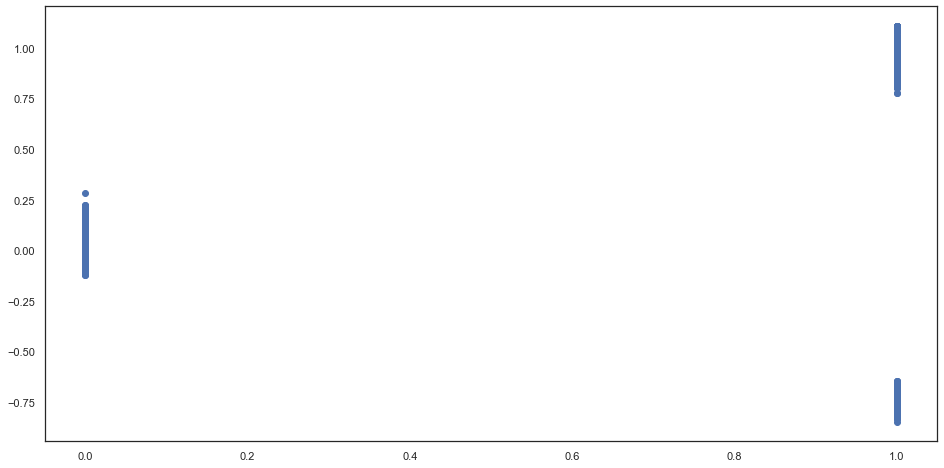

In [47]:
plt.scatter(testY,predictLR)

In [48]:
RLR = Ridge(alpha=0.001) # Object of Ridge it is for overfitting

In [49]:
RLR.fit(trainX,trainY)

Ridge(alpha=0.001)

In [50]:
preRtest = RLR.predict(testX)

In [51]:
print('r2_test for Ridge=',"%.4f"%metrics.r2_score(preRtest,testY))

r2_test for Ridge= 0.8261


### Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [52]:
X1=df1.drop('adr',axis=1)
Y1=df1['adr']

In [53]:
trainX1,testX1,trainY1,testY1 = train_test_split(X1,Y1,test_size=0.3, random_state=42)

In [54]:
X1.shape

(119390, 30)

In [55]:
Y1.shape

(119390,)

In [56]:
model = LinearRegression()

In [57]:
model.fit(trainX1,trainY1)

LinearRegression()

In [58]:
predictLR1 = model.predict(testX1)

In [59]:
print( predictLR1)

[130.52657689  89.68055443 113.7853662  ... 134.96158872 140.09793547
  85.06401451]


In [60]:
Y1.value_counts( dropna=False,ascending=True)

35.64        1
160.83       1
69.83        1
87.64        1
202.74       1
          ... 
0.00      1959
65.00     2418
90.00     2473
75.00     2715
62.00     3754
Name: adr, Length: 8879, dtype: int64

In [61]:
predictTrain1 = model.predict(trainX1)

In [62]:
print('r2 for training=',"%.4f"%metrics.r2_score(predictTrain1,trainY1))
print('MAE=',"%.4f"%metrics.mean_absolute_error(predictLR1,testY1))    #Mean Absolute Error
print('MSE:',"%.4f"%metrics.mean_squared_error(predictLR1,testY1))
print('RSME',"%.4f"%np.sqrt(metrics.mean_squared_error(predictLR1,testY1)))

r2 for training= -0.9011
MAE= 27.0836
MSE: 1398.4013
RSME 37.3952


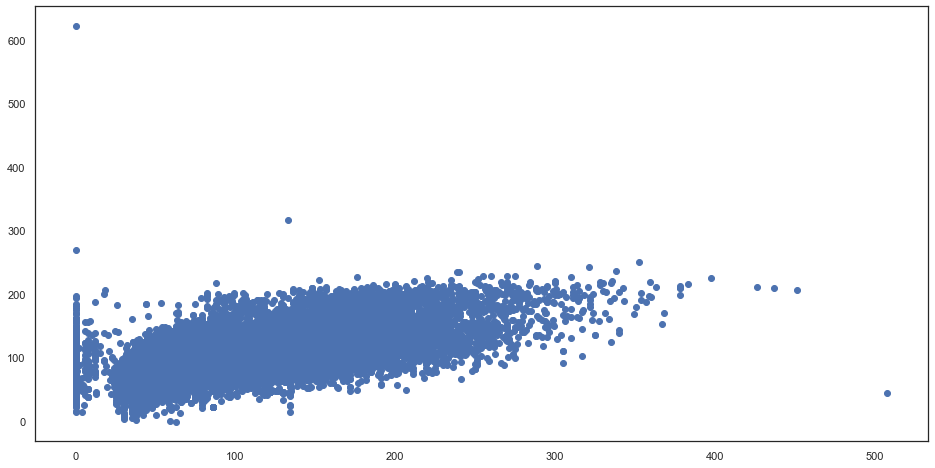

In [63]:
plt.scatter(testY1,predictLR1)

## Resort hotels - Predicting the choice of canceling the reservation or not of the client/User 

In [64]:
Resort =df1.loc[df1['hotel'] ==1]

In [65]:
Resort.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,6,27,1,0,0,2,...,3,0,0.0,0.0,0,2,0.0,0,0,1
1,1,0,737,2015,6,27,1,0,0,2,...,4,0,0.0,0.0,0,2,0.0,0,0,1
2,1,0,7,2015,6,27,1,0,1,1,...,0,0,0.0,0.0,0,2,75.0,0,0,1
3,1,0,13,2015,6,27,1,0,1,1,...,0,0,304.0,0.0,0,2,75.0,0,0,1
4,1,0,14,2015,6,27,1,0,2,2,...,0,0,240.0,0.0,0,2,98.0,0,1,1


In [66]:
X1=Resort.drop('is_canceled',axis=1)
Y1=Resort['is_canceled']

In [67]:
trainX1,testX1,trainY1,testY1 = train_test_split(X1,Y1,test_size=0.3, random_state=42)

In [68]:
X1.shape

(40060, 30)

In [69]:
Y1.shape

(40060,)

In [70]:
model = LinearRegression()

In [71]:
model.fit(trainX1,trainY1)

LinearRegression()

In [72]:
predictLR1 = model.predict(testX1)

In [73]:
print( predictLR1)

[0.05385787 0.02449956 0.92132173 ... 0.0425603  0.91736686 0.0332534 ]


In [74]:
Y1.value_counts( dropna=False,ascending=True).tail(40)

1    11122
0    28938
Name: is_canceled, dtype: int64

In [75]:
predictTrain1 = model.predict(trainX1)

In [76]:
print('r2 for training=',"%.4f"%metrics.r2_score(predictTrain1,trainY1))
print('MAE=',"%.4f"%metrics.mean_absolute_error(predictLR1,testY1))    #Mean Absolute Error
print('MSE:',"%.4f"%metrics.mean_squared_error(predictLR1,testY1))
print('RSME',"%.4f"%np.sqrt(metrics.mean_squared_error(predictLR1,testY1)))

r2 for training= 0.8437
MAE= 0.0569
MSE: 0.0239
RSME 0.1545


## City hotels - Predicting the choice of canceling the reservation or not of the client

In [77]:
City =df1.loc[df1['hotel'] == 0]

In [78]:
City.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
40060,0,0,6,2015,6,27,1,0,2,1,...,0,0,6.0,0.0,0,2,0.0,0,0,1
40061,0,1,88,2015,6,27,1,0,4,2,...,0,0,9.0,0.0,0,2,76.5,0,1,0
40062,0,1,65,2015,6,27,1,0,4,1,...,0,0,9.0,0.0,0,2,68.0,0,1,0
40063,0,1,92,2015,6,27,1,2,4,2,...,0,0,9.0,0.0,0,2,76.5,0,2,0
40064,0,1,100,2015,6,27,2,0,2,2,...,0,0,9.0,0.0,0,2,76.5,0,1,0


In [79]:
X1=City.drop('is_canceled',axis=1)
Y1=City['is_canceled']

In [80]:
trainX1,testX1,trainY1,testY1 = train_test_split(X1,Y1,test_size=0.3, random_state=42)

In [81]:
X1.shape

(79330, 30)

In [82]:
Y1.shape

(79330,)

In [83]:
model = LinearRegression()

In [84]:
model.fit(trainX1,trainY1)

LinearRegression()

In [85]:
predictLR1 = model.predict(testX1)

In [86]:
print( predictLR1)

[0.91085106 0.07481927 0.0752674  ... 0.10734843 0.07563273 0.14391518]


In [87]:
Y1.value_counts( dropna=False,ascending=True).tail(40)

1    33102
0    46228
Name: is_canceled, dtype: int64

In [88]:
predictTrain1 = model.predict(trainX1)

In [89]:
print('r2 for training=',"%.4f"%metrics.r2_score(predictTrain1,trainY1))
print('MAE=',"%.4f"%metrics.mean_absolute_error(predictLR1,testY1))    #Mean Absolute Error
print('MSE:',"%.4f"%metrics.mean_squared_error(predictLR1,testY1))
print('RSME',"%.4f"%np.sqrt(metrics.mean_squared_error(predictLR1,testY1)))

r2 for training= 0.8046
MAE= 0.0828
MSE: 0.0391
RSME 0.1978


#### END